In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\ajinkyaphanse\Downloads\Breast Cancer METABRIC.csv")

In [3]:
data.shape

(2509, 34)

In [4]:
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

(  Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
 0    MB-0000             75.65             Mastectomy  Breast Cancer   
 1    MB-0002             43.19      Breast Conserving  Breast Cancer   
 2    MB-0005             48.87             Mastectomy  Breast Cancer   
 3    MB-0006             47.68             Mastectomy  Breast Cancer   
 4    MB-0008             76.97             Mastectomy  Breast Cancer   
 
                         Cancer Type Detailed Cellularity Chemotherapy  \
 0           Breast Invasive Ductal Carcinoma         NaN           No   
 1           Breast Invasive Ductal Carcinoma        High           No   
 2           Breast Invasive Ductal Carcinoma        High          Yes   
 3  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
 4  Breast Mixed Ductal and Lobular Carcinoma        High          Yes   
 
   Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
 0                 claudin-low     1.0   

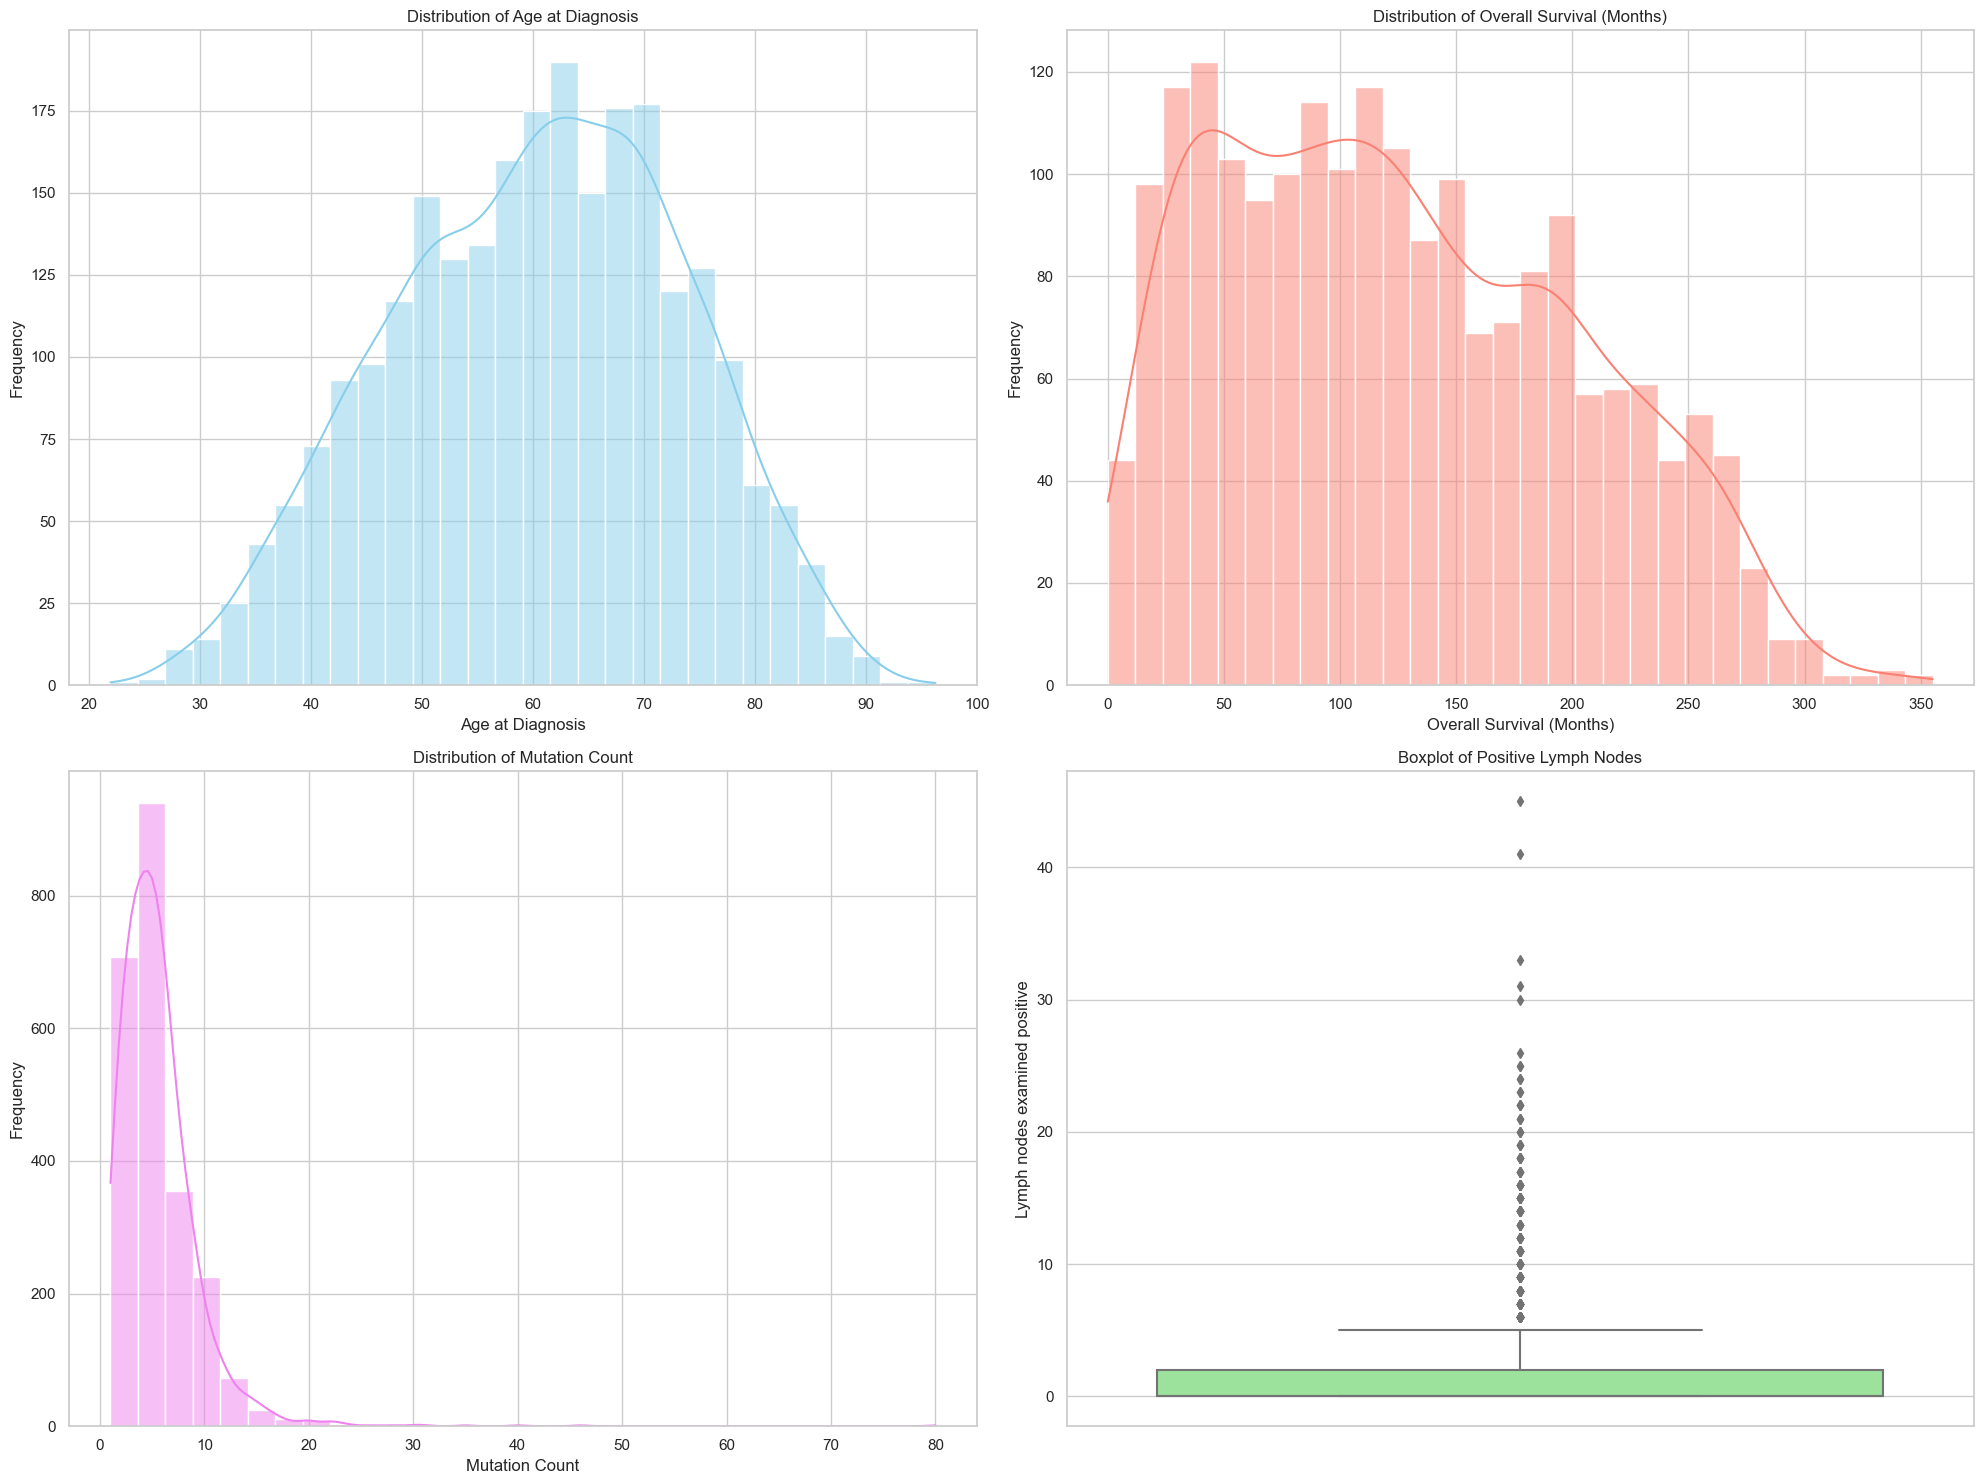

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.histplot(data['Age at Diagnosis'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age at Diagnosis')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(data['Overall Survival (Months)'].dropna(), bins=30, kde=True, color='salmon')
plt.title('Distribution of Overall Survival (Months)')
plt.xlabel('Overall Survival (Months)')
plt.ylabel('Frequency')


plt.subplot(2, 2, 3)
sns.histplot(data['Mutation Count'].dropna(), bins=30, kde=True, color='violet')
plt.title('Distribution of Mutation Count')
plt.xlabel('Mutation Count')
plt.ylabel('Frequency')


plt.subplot(2, 2, 4)
sns.boxplot(y=data['Lymph nodes examined positive'].dropna(), color='lightgreen')
plt.title('Boxplot of Positive Lymph Nodes')
plt.ylabel('Lymph nodes examined positive')


plt.tight_layout()
plt.show()

In [6]:
'''
1. Distribution of Age at Diagnosis
Graph Insight: The age distribution appears approximately normal, centered around the mid-50s, suggesting that middle-aged patients are predominantly affected by breast cancer in this dataset.
Clinical Relevance: Age is a crucial factor in breast cancer prognosis; typically, younger patients may have more aggressive forms of cancer and different therapeutic approaches might be required.
2. Distribution of Overall Survival (Months)
Graph Insight: The survival time distribution shows a wide range, with a significant number of patients having relatively short survival times post-diagnosis, but also a sizeable number surviving for extended periods.
Clinical Relevance: This indicates a high variability in outcomes, which could be influenced by factors such as cancer subtype, stage at diagnosis, and treatment modalities. Analyzing the correlation of these factors with survival time could identify key prognostic factors.
3. Distribution of Mutation Count
Graph Insight: The distribution of mutation counts is right-skewed, with most patients having a low number of mutations but a few patients showing a high mutation burden.
Clinical Relevance: A higher mutation count can be associated with certain genetic predispositions and potentially a higher risk of adverse outcomes. It may also suggest responsiveness to certain treatments, like immunotherapy.
4. Boxplot of Positive Lymph Nodes
Graph Insight: The majority of patients have few positive lymph nodes, but there are outliers with a significantly higher count.
Clinical Relevance: The number of lymph nodes that contain cancer is a crucial prognostic factor in breast cancer. Patients with more positive lymph nodes generally have worse outcomes and may require more aggressive treatment.
'''

'\n1. Distribution of Age at Diagnosis\nGraph Insight: The age distribution appears approximately normal, centered around the mid-50s, suggesting that middle-aged patients are predominantly affected by breast cancer in this dataset.\nClinical Relevance: Age is a crucial factor in breast cancer prognosis; typically, younger patients may have more aggressive forms of cancer and different therapeutic approaches might be required.\n2. Distribution of Overall Survival (Months)\nGraph Insight: The survival time distribution shows a wide range, with a significant number of patients having relatively short survival times post-diagnosis, but also a sizeable number surviving for extended periods.\nClinical Relevance: This indicates a high variability in outcomes, which could be influenced by factors such as cancer subtype, stage at diagnosis, and treatment modalities. Analyzing the correlation of these factors with survival time could identify key prognostic factors.\n3. Distribution of Mutation

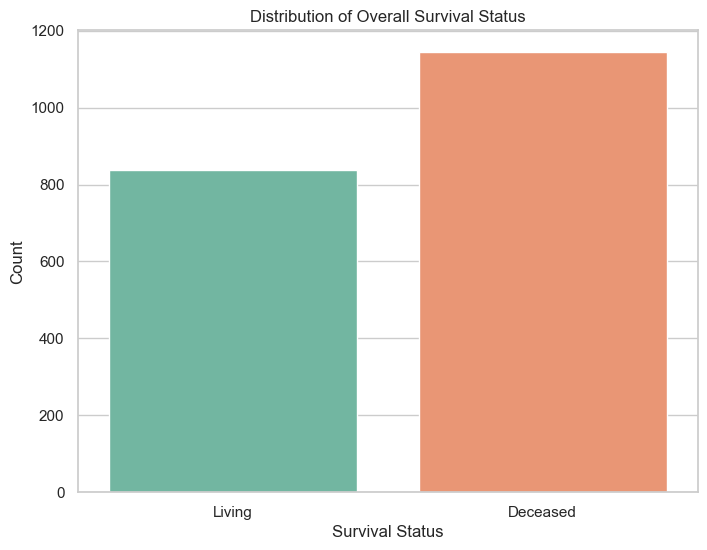

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Overall Survival Status', data=data, palette='Set2')
plt.title('Distribution of Overall Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()

In [8]:
import pandas as pd
from scipy.stats import mode

df_metabric = data  


def fill_with_mode(x):
    modes = x.mode()
    if not modes.empty:
        return modes[0]
    else:
        return None

def handle_nulls(df):
    df['Relapse Free Status'] = df.groupby('Cancer Type Detailed')['Relapse Free Status'].transform(lambda x: x.fillna(fill_with_mode(x)))

    df['Relapse Free Status (Months)'] = df.groupby(['Cancer Type Detailed', 'Relapse Free Status'])['Relapse Free Status (Months)'].transform(lambda x: x.fillna(x.mean()))

 
    df['Overall Survival Status'] = df.groupby(['Cancer Type Detailed', 'Relapse Free Status'])['Overall Survival Status'].transform(lambda x: x.fillna(fill_with_mode(x)))
    df['Overall Survival (Months)'] = df.groupby(['Cancer Type Detailed', 'Overall Survival Status'])['Overall Survival (Months)'].transform(lambda x: x.fillna(x.mean()))


    df['ER status measured by IHC'] = df['ER status measured by IHC'].fillna(fill_with_mode(df['ER status measured by IHC']))
    df['ER Status'] = df.groupby('ER status measured by IHC')['ER Status'].transform(lambda x: x.fillna(fill_with_mode(x)))
    df['HER2 status measured by SNP6'] = df['HER2 status measured by SNP6'].fillna(fill_with_mode(df['HER2 status measured by SNP6']))
    df['HER2 Status'] = df.groupby('HER2 status measured by SNP6')['HER2 Status'].transform(lambda x: x.fillna(fill_with_mode(x)))
    df['PR Status'] = df.groupby('Cancer Type Detailed')['PR Status'].transform(lambda x: x.fillna(fill_with_mode(x)))

    df['Chemotherapy'] = df.groupby('Cancer Type Detailed')['Chemotherapy'].transform(lambda x: x.fillna(fill_with_mode(x)))
    df['Hormone Therapy'] = df.groupby('Cancer Type Detailed')['Hormone Therapy'].transform(lambda x: x.fillna(fill_with_mode(x)))
    df['Radio Therapy'] = df.groupby('Cancer Type Detailed')['Radio Therapy'].transform(lambda x: x.fillna(fill_with_mode(x)))

    return df

data_cleaned = handle_nulls(df_metabric)


In [9]:
data_cleaned

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.650000,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.520000,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.280000,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.760000,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.550000,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,No,NaN,1.0,Positve,...,Deceased,Negative,No,4.930000,Recurred,Female,NaN,27.0,1.0,NaN
2505,MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,No,NaN,1.0,Positve,...,Deceased,Negative,No,16.180000,Recurred,Female,NaN,28.0,2.0,NaN
2506,MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,No,NaN,NaN,Positve,...,Living,Negative,No,149.118281,Not Recurred,Female,NaN,NaN,0.0,NaN
2507,MTS-T2431,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,No,NaN,NaN,Positve,...,Living,Negative,No,149.118281,Not Recurred,Female,NaN,NaN,0.0,NaN


In [10]:
import numpy as np
from sklearn.preprocessing import LabelEncoder


df_metabric = data_cleaned 

object_cols = ['Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 'Cellularity',
               'Chemotherapy', 'Pam50 + Claudin-low subtype', 'ER status measured by IHC',
               'ER Status', 'HER2 status measured by SNP6', 'HER2 Status', 'Tumor Other Histologic Subtype',
               'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality',
               'Oncotree Code', 'PR Status', 'Radio Therapy', 'Sex', '3-Gene classifier subtype']

for col in object_cols:
    le = LabelEncoder()
    df_metabric[col] = le.fit_transform(df_metabric[col].fillna('Missing'))

df_metabric['Overall Survival Status'] = df_metabric['Overall Survival Status'].map({'Living': 0, 'Deceased': 1}).astype(np.uint8)
df_metabric['Relapse Free Status'] = df_metabric['Relapse Free Status'].map({'Not Recurred': 0, 'Recurred': 1}).astype(np.uint8)
df_metabric[object_cols + ['Overall Survival Status', 'Relapse Free Status']].head()


,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,ER status measured by IHC,ER Status,HER2 status measured by SNP6,HER2 Status,...,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Oncotree Code,PR Status,Radio Therapy,Sex,3-Gene classifier subtype,Overall Survival Status,Relapse Free Status
0,1,0,2,2,0,7,1,1,2,0,...,1,4,2,2,0,1,0,2,0,0
1,0,0,2,0,0,2,1,1,2,0,...,2,4,2,2,1,1,0,0,0,0
2,1,0,2,0,1,3,1,1,2,0,...,2,3,2,2,1,0,0,4,1,1
3,1,0,5,3,1,3,1,1,2,0,...,2,10,2,6,1,1,0,4,0,0
4,1,0,5,0,1,3,1,1,2,0,...,1,10,2,6,1,1,0,0,1,1


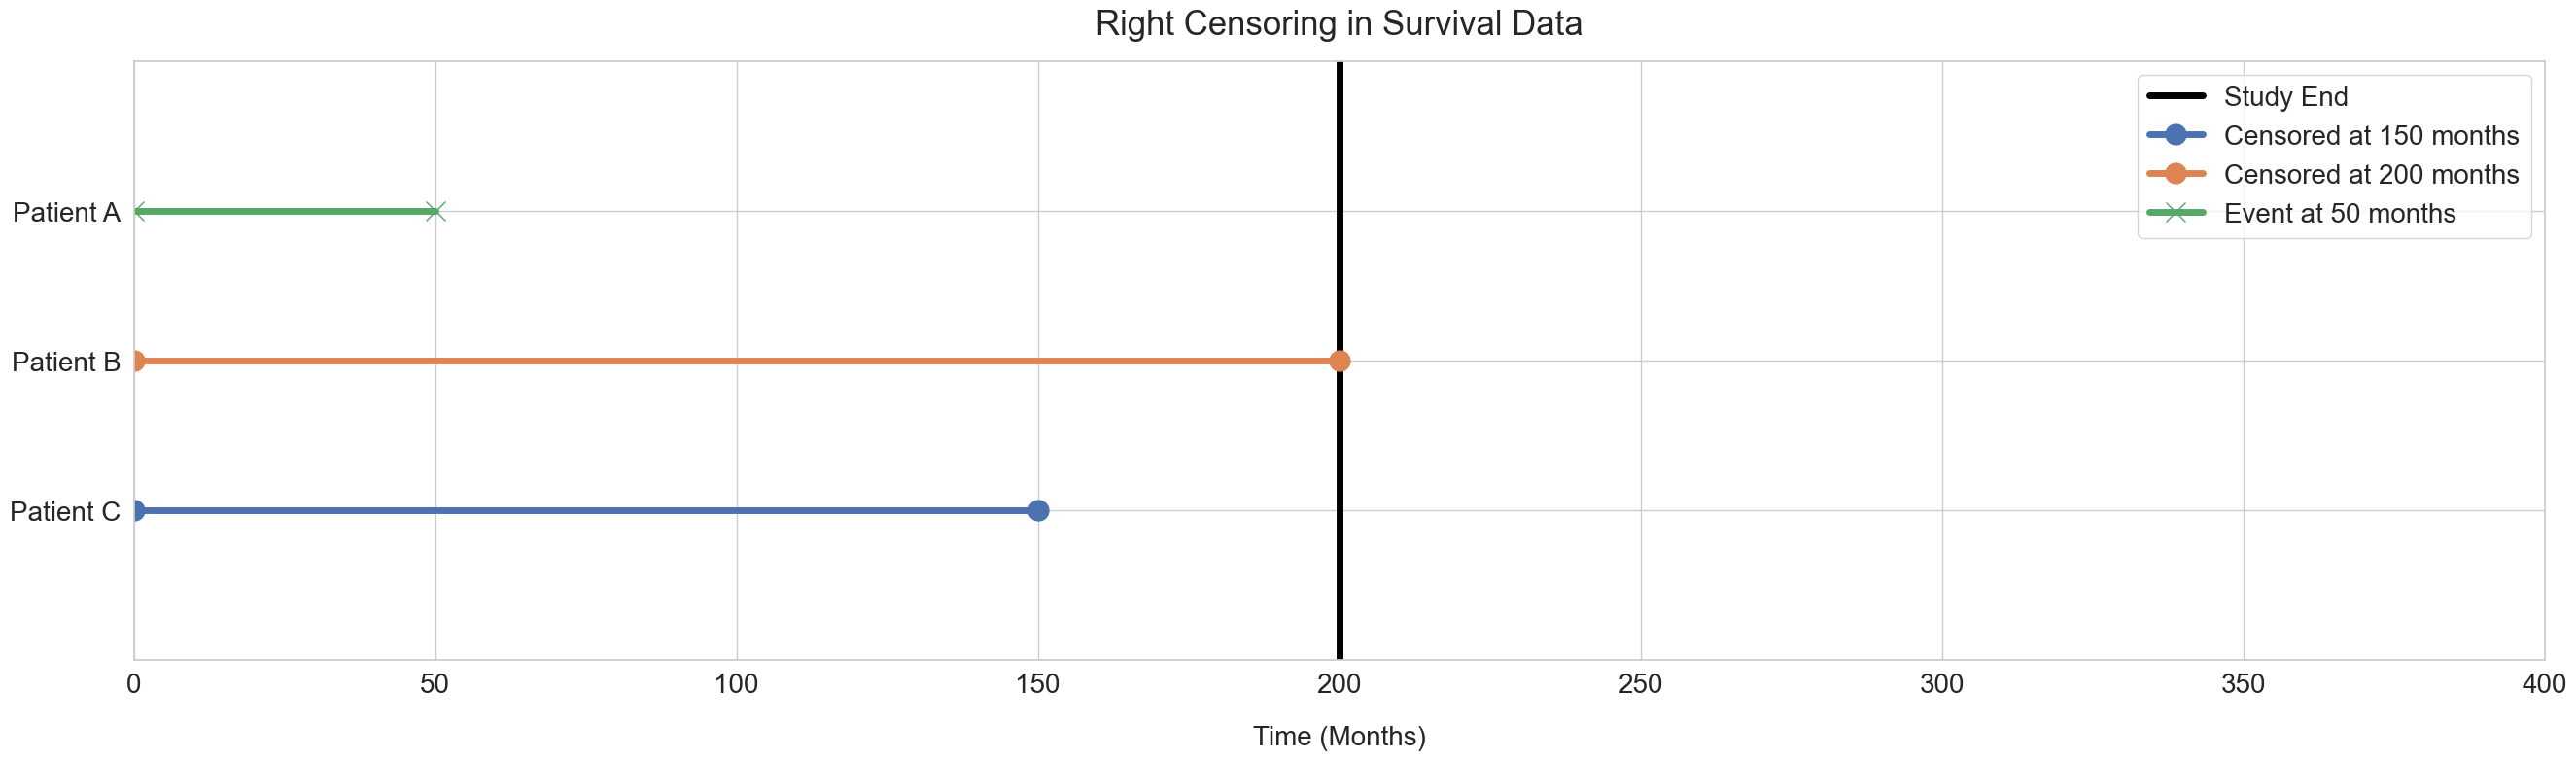

In [11]:
## Right censoring of data
#Patient A: Experiences event before the study ends
#Patient B: Survives passed the end of the study
#Patient C: Withdraws from the study.

fig = plt.figure(figsize=(32, 8))

plt.xlim(0, 400)
plt.ylim(0, 4)
plt.axvline(200, color='black', label='Study End', linewidth=5)
plt.plot([0, 150], [1, 1], marker='o', markersize=15, linewidth=5, label='Censored at 150 months')
plt.plot([0, 200], [2, 2], marker='o', markersize=15, linewidth=5, label='Censored at 200 months')
plt.plot([0, 50], [3, 3], marker='x', markersize=15, linewidth=5, label='Event at 50 months')

plt.xlabel('Time (Months)', size=20, labelpad=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.yticks([1, 2, 3], ['Patient C', 'Patient B', 'Patient A'])
plt.legend(prop={'size': 20})
plt.title('Right Censoring in Survival Data', size=25, pad=20)

plt.show()

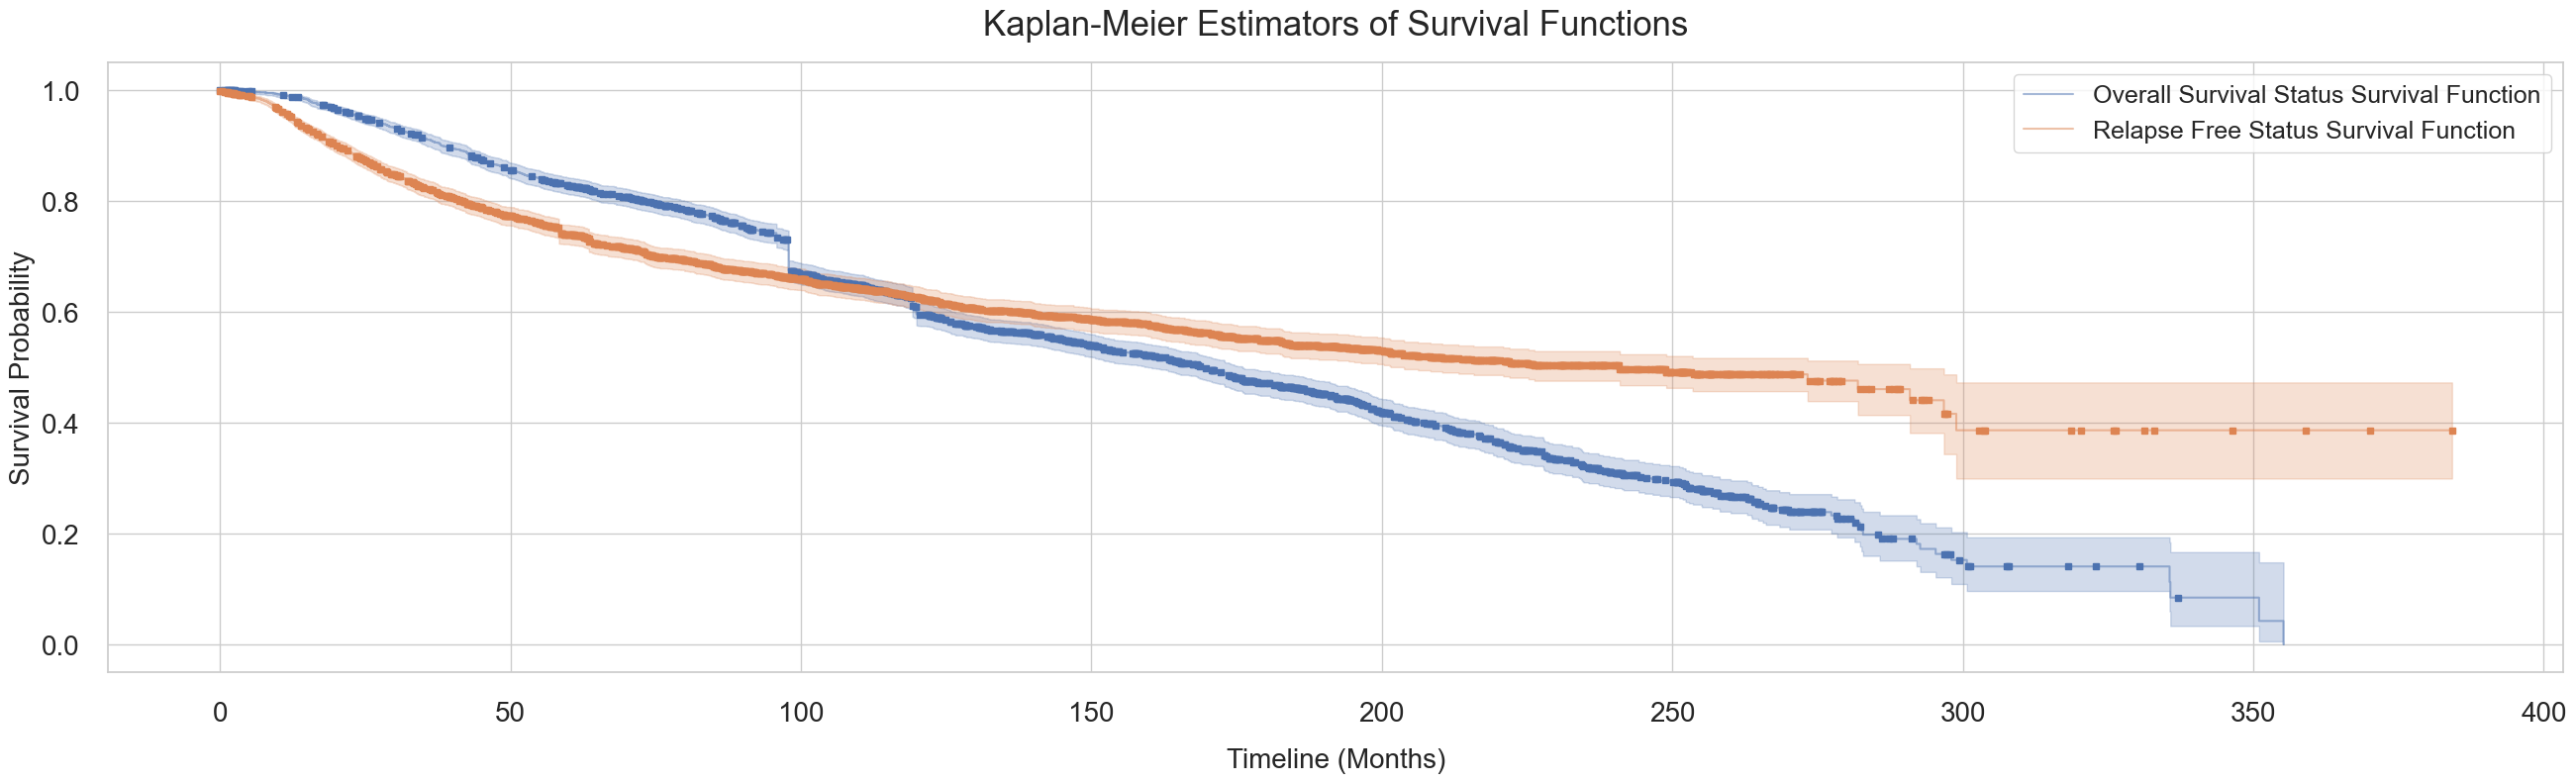

In [12]:
from lifelines import KaplanMeierFitter

df_train = df_metabric 
kmf = KaplanMeierFitter()
fig = plt.figure(figsize=(32, 8))

for time, event in zip(['Overall Survival (Months)', 'Relapse Free Status (Months)'], ['Overall Survival Status', 'Relapse Free Status']):
    T, E = df_train[time], df_train[event]
    kmf.fit(T, E, label=event)
    kmf.plot(label=f'{event} Survival Function', alpha=0.5, show_censors=True, censor_styles={'ms': 4, 'marker': 's'})

plt.xlabel('Timeline (Months)', size=20, labelpad=15)
plt.ylabel('Survival Probability', size=20)
plt.tick_params(axis='x', labelsize=20, pad=15)
plt.tick_params(axis='y', labelsize=20, pad=15)
plt.legend(prop={'size': 18})
plt.title('Kaplan-Meier Estimators of Survival Functions', size=25, pad=20)

plt.show()

In [13]:
kmf.survival_function_.head()

,Relapse Free Status
timeline,
0.00,0.998804
0.03,0.998406
0.10,0.998007
0.33,0.998007
0.36,0.997608


In [14]:
#!pip install -U scikit-learn==1.3.0 ##

In [15]:
#!pip install scikit-survival ##

Checking columns in DataFrame: ['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade', 'HER2 status measured by SNP6', 'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality', 'Lymph nodes examined positive', 'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code', 'Overall Survival (Months)', 'Overall Survival Status', 'PR Status', 'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status', 'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage', "Patient's Vital Status"]


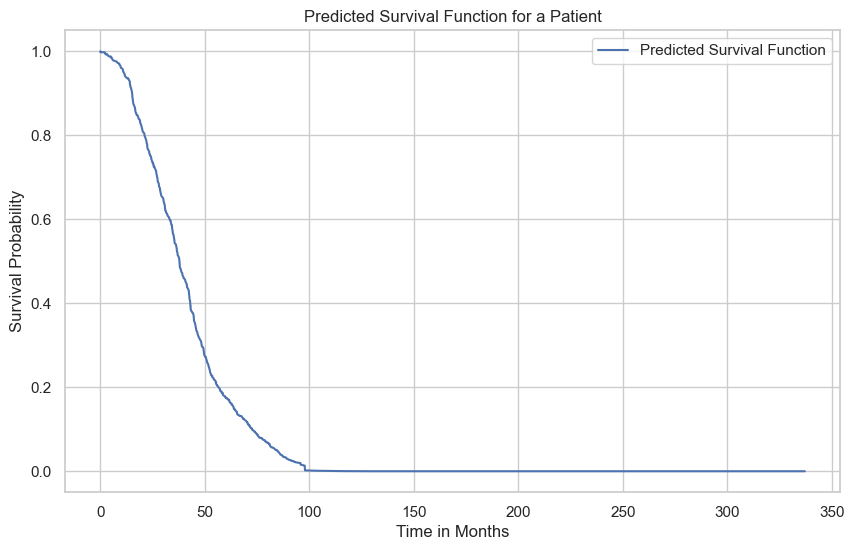

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.util import Surv
import matplotlib.pyplot as plt


print("Checking columns in DataFrame:", df_metabric.columns.tolist())

numeric_features = df_metabric.select_dtypes(include=['int32', 'float64', 'uint8']).columns.tolist()

if 'Overall Survival (Months)' in numeric_features:
    numeric_features.remove('Overall Survival (Months)')
if 'Overall Survival Status' in numeric_features:
    numeric_features.remove('Overall Survival Status')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gbm', GradientBoostingSurvivalAnalysis(random_state=42))
])

y = Surv.from_arrays(event=df_metabric['Overall Survival Status'].astype(bool), time=df_metabric['Overall Survival (Months)'])
X = df_metabric.drop(['Overall Survival Status', 'Overall Survival (Months)', 'Patient ID', "Patient's Vital Status"], axis=1, errors='ignore')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_transformed = model_pipeline.named_steps['preprocessor'].fit_transform(X_train)
model_pipeline.named_steps['gbm'].fit(X_train_transformed, y_train)
X_test_transformed = model_pipeline.named_steps['preprocessor'].transform(X_test)
pred_surv = model_pipeline['gbm'].predict_survival_function(X_test_transformed, return_array=True)

plt.figure(figsize=(10, 6))
plt.plot(model_pipeline['gbm'].unique_times_, pred_surv[0], label='Predicted Survival Function')
plt.title('Predicted Survival Function for a Patient')
plt.xlabel('Time in Months')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

In [20]:
X_train_transformed
#df_metabric.head()

array([[45.3       ,  1.        ,  0.        , ...,  3.        ,
        50.        ,  1.71087719],
       [51.        ,  2.        ,  0.        , ...,  4.        ,
        25.87604222,  1.71087719],
       [39.3       ,  1.        ,  0.        , ...,  0.        ,
        23.        ,  2.        ],
       ...,
       [72.54      ,  0.        ,  0.        , ...,  1.        ,
        22.        ,  1.71087719],
       [61.28      ,  1.        ,  0.        , ...,  3.        ,
        25.        ,  2.        ],
       [74.32      ,  1.        ,  0.        , ...,  0.        ,
        20.        ,  2.        ]])

In [31]:
X_train.isna().sum()

Age at Diagnosis                    6
Type of Breast Surgery              0
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                         0
Chemotherapy                        0
Pam50 + Claudin-low subtype         0
Cohort                              6
ER status measured by IHC           0
ER Status                           0
Neoplasm Histologic Grade          95
HER2 status measured by SNP6        0
HER2 Status                         0
Tumor Other Histologic Subtype      0
Hormone Therapy                     0
Inferred Menopausal State           0
Integrative Cluster                 0
Primary Tumor Laterality            0
Lymph nodes examined positive     200
Mutation Count                    119
Nottingham prognostic index       177
Oncotree Code                       0
PR Status                           0
Radio Therapy                       0
Relapse Free Status (Months)        0
Relapse Free Status                 0
Sex         

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

numeric_features = df_metabric.select_dtypes(include=['int32', 'float64', 'uint8']).columns.tolist()
categorical_features = df_metabric.select_dtypes(include=['object']).columns.tolist()

target_columns = ['Overall Survival Status', 'Overall Survival (Months)']
for col in target_columns:
    if col in numeric_features:
        numeric_features.remove(col)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean for numeric data
    ('scaler', StandardScaler())                 # Standardize features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))  # Impute missing values with the most frequent value for categorical data
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the feature matrix X
X = df_metabric.drop(target_columns, axis=1, errors='ignore')  # Exclude target columns from the feature matrix
X_preprocessed = preprocessor.fit_transform(X)  # Fit and transform the data

# Optionally convert back to a DataFrame if needed, with imputed and scaled/encoded values
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=numeric_features + categorical_features, index=X.index)

# Display the first few rows of the preprocessed DataFrame to verify
print(X_preprocessed_df.head())


  Age at Diagnosis Type of Breast Surgery Cancer Type Cancer Type Detailed  \
0         1.171354               0.127042     -0.0346            -0.486919   
1        -1.325225              -1.252823     -0.0346            -0.486919   
2        -0.888362               0.127042     -0.0346            -0.486919   
3        -0.979888               0.127042     -0.0346             1.882208   
4         1.272878               0.127042     -0.0346             1.882208   

  Cellularity Chemotherapy Pam50 + Claudin-low subtype   Cohort  \
0     0.44324    -0.443251                    2.112718 -0.97078   
1   -1.136432    -0.443251                   -0.549935 -0.97078   
2   -1.136432      2.25606                   -0.017404 -0.97078   
3    1.233076      2.25606                   -0.017404 -0.97078   
4   -1.136432      2.25606                   -0.017404 -0.97078   

  ER status measured by IHC ER Status  ... PR Status Radio Therapy  \
0                   0.56615  0.587629  ... -1.197314      

In [29]:
X_preprocessed_df.isna().sum()

Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)      0
Relapse Free Status               0
Sex                               0
3-Gene classifier subtype   

In [27]:
X.dtypes

Age at Diagnosis                  float64
Type of Breast Surgery              int32
Cancer Type                         int32
Cancer Type Detailed                int32
Cellularity                         int32
Chemotherapy                        int32
Pam50 + Claudin-low subtype         int32
Cohort                            float64
ER status measured by IHC           int32
ER Status                           int32
Neoplasm Histologic Grade         float64
HER2 status measured by SNP6        int32
HER2 Status                         int32
Tumor Other Histologic Subtype      int32
Hormone Therapy                     int32
Inferred Menopausal State           int32
Integrative Cluster                 int32
Primary Tumor Laterality            int32
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       float64
Oncotree Code                       int32
PR Status                           int32
Radio Therapy                     